Pergunta: De que maneira(s) o número de veículos por 1000 pessoas (%) e desemprego de indivíduos acima de 15 anos (%) afetam o IDH de um país e que relações existem entre os dois primeiros indicadores (se alguma)?

In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [66]:
HDI = pd.read_excel('hdi_human_development_index.xlsx')
Desemprego = pd.read_excel('aged_15plus_unemployment_rate_percent.xlsx')
Veiculos = pd.read_excel('cars_trucks_and_buses_per_1000_persons.xlsx')

In [67]:
HDI_2005 = HDI.loc[:, ['geo', 2005]]

Desemprego_2005 = Desemprego.loc[:, ['geo', 2005]]

Veiculos_2005 = Veiculos.loc[:, ['geo', 2005]]


In [68]:
Desemprego_2005.head(3)

,geo,2005
0,Australia,5.1
1,Canada,6.7
2,Czech Republic,8.3


In [69]:
HDI_idx = HDI_2005.set_index('geo')

In [70]:
Desemprego_idx = Desemprego_2005.set_index('geo')

In [71]:
Veiculos_idx = Veiculos_2005.set_index('geo')
Veiculos_idx = Veiculos_idx.add_suffix("_Veiculos")

In [72]:
CD = HDI_idx.join(Desemprego_idx, how='inner', lsuffix='_HDI', rsuffix='_Desemprego')
CD.head(9)

,2005_HDI,2005_Desemprego
geo,,
Australia,0.915,5.1
Canada,0.891,6.7
Czech Republic,0.847,8.3
Estonia,0.822,7.9
Finland,0.869,8.3
France,0.870,9.9
Germany,0.892,11.1
Ireland,0.896,4.3
Japan,0.873,4.4


In [73]:
data = CD.join(Veiculos_idx, how="inner")
data.head(9)
#data.loc[:,"2005_Veiculos"]

,2005_HDI,2005_Desemprego,2005_Veiculos
geo,,,
Australia,0.915,5.1,671.0
Canada,0.891,6.7,NaN
Czech Republic,0.847,8.3,NaN
Estonia,0.822,7.9,477.0
Finland,0.869,8.3,531.0
France,0.870,9.9,596.0
Germany,0.892,11.1,585.0
Ireland,0.896,4.3,NaN
Japan,0.873,4.4,NaN


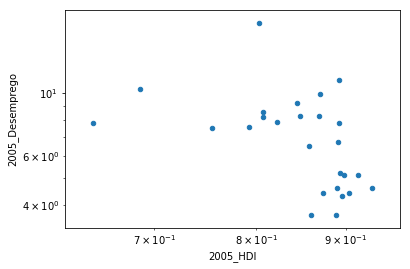

In [74]:
data.plot.scatter(x = "2005_HDI", y = "2005_Desemprego", loglog = True)

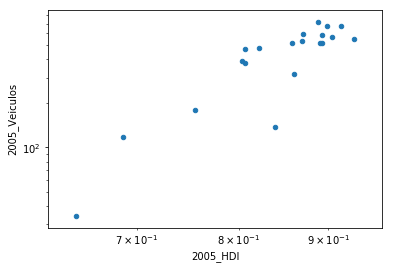

In [75]:
data.plot.scatter(x = "2005_HDI", y = "2005_Veiculos", loglog = True)

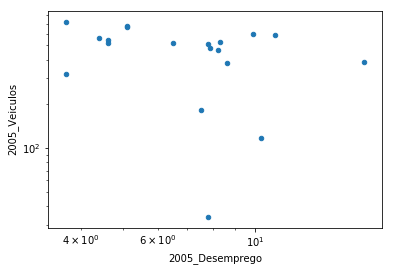

In [76]:
data.plot.scatter(x = "2005_Desemprego", y = "2005_Veiculos", loglog = True)

In [1]:
#Oi